# TFLearn, 1. Basics, 1. Linear Regression

In [2]:
%matplotlib inline

from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tflearn
import numpy as np
import matplotlib.pyplot as plt

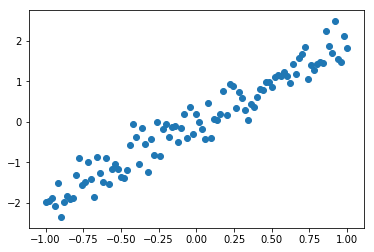

In [3]:
# Fake data generation based on
# linear model y = 2x, and some noise
X = np.linspace(-1, 1, 101)
Y = 2 * X + np.random.randn(*X.shape) * 0.33

plt.scatter(X, Y)

In [4]:
for optimizer in ['SGD', 'Adam']:
    for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
        for n_epoch in [1, 10, 100, 1000]:
        
            tf.reset_default_graph()

            run_id = optimizer + ', ' + str(learning_rate) + ", n" + str(n_epoch)
    
            input_ = tflearn.input_data(shape=[None])
            linear = tflearn.single_unit(input_)
            regression = tflearn.regression(linear, optimizer=optimizer, loss='mean_square', metric='R2', learning_rate=learning_rate)
            m = tflearn.DNN(regression)
            m.fit(X, Y, n_epoch=n_epoch, show_metric=True, snapshot_epoch=False, run_id=run_id)

Training Step: 2000  | total loss: 0.64976 | time: 0.005s
| Adam | epoch: 1000 | loss: 0.64976 - R2: 0.3121 -- iter: 101/101


In [4]:
print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))


Regression result:
Y = [ 0.25989383]*X + [ 0.74024945]


In [5]:
print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))
# should output (close, not exact) y = [1.5315033197402954, 1.5585315227508545, 1.5855598449707031]


Test prediction for x = 3.2, 3.3, 3.4:
[1.5719096660614014, 1.597899079322815, 1.6238884925842285]
